In [951]:
import pyblp
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import functions as fun
from linearmodels.iv import IV2SLS
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

pyblp.options.digits = 3
pyblp.options.verbose = False
pd.options.display.precision = 3
pd.options.display.max_columns = 50

import IPython.display
IPython.display.display(IPython.display.HTML('<style>pre { white-space: pre !important; }</style>'))

In [952]:
df = pd.read_csv('dataset.csv')
Nobs=df['ID'].count()
df['Intercept']=np.ones((Nobs,1))
df.rename(columns={'Market share':'Market_share'}, inplace=True)
df2 = df[df['Market_share'] != 0]

df2.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
8,1,2021,1.037e-02,Aiways,U5,400,2.846e+05,201,34,SUV,C,CN,257,1.0
9,1,2022,5.976e-03,Aiways,U5,400,3.137e+05,201,34,SUV,C,CN,183,1.0
10,1,2023,2.860e-03,Aiways,U5,400,2.645e+05,201,34,SUV,C,CN,177,1.0
21,2,2023,4.848e-05,Aiways,U6,405,3.606e+05,214,34,SUV,C,CN,3,1.0
28,3,2019,4.063e-02,Audi,e-tron,375,9.797e+05,402,17,SUV,F,DE,222,1.0
29,3,2020,3.468e-02,Audi,e-tron,375,8.901e+05,402,17,SUV,F,DE,491,1.0
30,3,2021,1.049e-02,Audi,e-tron,375,8.000e+05,402,17,SUV,F,DE,260,1.0
31,3,2022,1.757e-02,Audi,e-tron,375,7.897e+05,402,17,SUV,F,DE,538,1.0
32,3,2023,1.099e-03,Audi,e-tron,375,6.730e+05,402,17,SUV,F,DE,68,1.0
41,4,2021,3.391e-03,Audi,e-tron GT,472,1.279e+06,522,17,Sedan,F,DE,84,1.0


In [953]:
data = df2.copy().reset_index(drop=True)
data.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
0,1,2021,1.037e-02,Aiways,U5,400,2.846e+05,201,34,SUV,C,CN,257,1.0
1,1,2022,5.976e-03,Aiways,U5,400,3.137e+05,201,34,SUV,C,CN,183,1.0
2,1,2023,2.860e-03,Aiways,U5,400,2.645e+05,201,34,SUV,C,CN,177,1.0
3,2,2023,4.848e-05,Aiways,U6,405,3.606e+05,214,34,SUV,C,CN,3,1.0
4,3,2019,4.063e-02,Audi,e-tron,375,9.797e+05,402,17,SUV,F,DE,222,1.0
5,3,2020,3.468e-02,Audi,e-tron,375,8.901e+05,402,17,SUV,F,DE,491,1.0
6,3,2021,1.049e-02,Audi,e-tron,375,8.000e+05,402,17,SUV,F,DE,260,1.0
7,3,2022,1.757e-02,Audi,e-tron,375,7.897e+05,402,17,SUV,F,DE,538,1.0
8,3,2023,1.099e-03,Audi,e-tron,375,6.730e+05,402,17,SUV,F,DE,68,1.0
9,4,2021,3.391e-03,Audi,e-tron GT,472,1.279e+06,522,17,Sedan,F,DE,84,1.0


In [954]:
def regions(country):
    if country in ['DE', 'FR', 'DK', 'IT', 'RO', 'CZ', 'ES', 'SE']:
        return 'EU'
    elif country in ['JP', 'KR']:
        return 'Asia'
    elif country in ['CN']:
        return 'China'
    else:
        return country
    
data['Region'] = data['Country'].apply(regions)

In [955]:
fun.BLP(data, 'Range')
fun.BLP(data, 'HP')
fun.BLP(data, 'Chargetime')
fun.GH(data, 'Range', 0.5)
fun.GH(data, 'HP', 0.5)
fun.GH(data, 'Chargetime', 0.5)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept,Region,Range_BLP,HP_BLP,Chargetime_BLP,Range_GH,HP_GH,Chargetime_GH
0,1,2021,1.037e-02,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257,1.0,China,21513,13583,1861,14999,7405,1317
1,1,2022,5.976e-03,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183,1.0,China,32180,20339,2664,21535,10602,1796
2,1,2023,2.860e-03,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177,1.0,China,41774,26403,3241,27923,15010,2099
3,2,2023,4.848e-05,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3,1.0,China,41769,26390,3241,27468,14562,2099
4,3,2019,4.063e-02,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0,EU,5809,3901,570,4709,3105,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,189,2023,6.464e-05,Volvo,EX30,475,368245.000,268,28,SUV,B,SE,4,1.0,EU,41699,26336,3247,21894,17776,1813
330,190,2021,1.465e-02,Volvo,XC40,457,462060.600,402,28,SUV,C,SE,363,1.0,EU,21456,13382,1867,11699,10265,1138
331,190,2022,3.331e-02,Volvo,XC40,457,416263.400,402,28,SUV,C,SE,1020,1.0,EU,32123,20138,2670,17028,16217,1483
332,190,2023,3.175e-02,Volvo,XC40,457,439266.600,402,28,SUV,C,SE,1965,1.0,EU,41717,26202,3247,22067,19786,1813


In [956]:
product_data = data.rename(columns={
    'Year': 'market_ids',
    'Model': 'product_ids',
    'Market_share': 'shares',
    'Price': 'prices',
    'Manufacturer': 'firm_ids',
})

In [957]:
#Scale for better intepretation
product_data['prices'] = product_data['prices']/10_000 #(Change in ms(%) for change in pris in 10.000)
product_data['HP'] = product_data['HP']/10           #(Change in ms(%) for change in HP in 10)
product_data['Range'] = product_data['Range']/10     #(Change in ms(%) for change in rækkevidde in 10)

In [958]:
# Creating dummy for china
product_data['China'] = (product_data['Country'] == 'CN').astype(int)

# Outside share

In [959]:
product_data.loc[product_data['market_ids'] == 2013, 'shares'] = product_data.loc[product_data['market_ids'] == 2013, 'Sales'] / 180632
product_data.loc[product_data['market_ids'] == 2014, 'shares'] = product_data.loc[product_data['market_ids'] == 2014, 'Sales'] / 188406
product_data.loc[product_data['market_ids'] == 2015, 'shares'] = product_data.loc[product_data['market_ids'] == 2015, 'Sales'] / 206653
product_data.loc[product_data['market_ids'] == 2016, 'shares'] = product_data.loc[product_data['market_ids'] == 2016, 'Sales'] / 222471
product_data.loc[product_data['market_ids'] == 2017, 'shares'] = product_data.loc[product_data['market_ids'] == 2017, 'Sales'] / 221471
product_data.loc[product_data['market_ids'] == 2018, 'shares'] = product_data.loc[product_data['market_ids'] == 2018, 'Sales'] / 252328
product_data.loc[product_data['market_ids'] == 2019, 'shares'] = product_data.loc[product_data['market_ids'] == 2019, 'Sales'] / 258727
product_data.loc[product_data['market_ids'] == 2020, 'shares'] = product_data.loc[product_data['market_ids'] == 2020, 'Sales'] / 230060
product_data.loc[product_data['market_ids'] == 2021, 'shares'] = product_data.loc[product_data['market_ids'] == 2021, 'Sales'] / 222210
product_data.loc[product_data['market_ids'] == 2022, 'shares'] = product_data.loc[product_data['market_ids'] == 2022, 'Sales'] / 181030
product_data.loc[product_data['market_ids'] == 2023, 'shares'] = product_data.loc[product_data['market_ids'] == 2023, 'Sales'] / 203690

In [960]:
product_data['outside_share'] = 1 - product_data.groupby('market_ids')['shares'].transform('sum')
product_data[['shares', 'outside_share']].describe()

,shares,outside_share
count,3.340e+02,334.000
mean,2.128e-03,0.841
std,5.618e-03,0.109
min,4.347e-06,0.696
25%,1.227e-04,0.696
50%,7.149e-04,0.831
75%,2.161e-03,0.938
max,8.814e-02,0.998


# Pure Logit OLS Demand

In [961]:
product_data['demand_instruments0'] = product_data['prices']
ols = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)')
ols_problem = pyblp.Problem(ols, product_data)
ols_results = ols_problem.solve(se_type='robust')
ols_results

Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Shares   Condition Number  Condition Number 
----  ---------  -------  ----------------  -----------------
 2    +2.06E-28     0        +1.84E+01          +1.86E+01    

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
  prices        Range         HP       Chargetime 
-----------  -----------  -----------  -----------
 -4.53E-02    +1.37E-01    -4.58E-03    -3.14E-02 
(+6.16E-03)  (+1.69E-02)  (+1.50E-02)  (+1.27E-02)

In [962]:
total_count = 0
for i in range(2013,2024):
    ols_elasticities = ols_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(ols_elasticities).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 31


# Pure Logit BLP Demand

In [963]:
product_data['demand_instruments0'] = product_data['Range_BLP']
product_data['demand_instruments1'] = product_data['HP_BLP']
product_data['demand_instruments2'] = product_data['Chargetime_BLP']
blp = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)')
blp_problem = pyblp.Problem(blp, product_data)
blp_results = blp_problem.solve(se_type='robust')
blp_results

Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Shares   Condition Number  Condition Number 
----  ---------  -------  ----------------  -----------------
 2    +7.46E+00     0        +1.82E+07          +1.76E+02    

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
  prices        Range         HP       Chargetime 
-----------  -----------  -----------  -----------
 -2.20E-02    +1.40E-01    -4.45E-02    -3.43E-02 
(+4.28E-02)  (+3.23E-02)  (+5.64E-02)  (+1.42E-02)

In [964]:
total_count = 0
for i in range(2013,2024):
    blp_elasticities = blp_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(blp_elasticities).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 229


# Pure Logit GH Demand

In [965]:
product_data['demand_instruments0'] = product_data['Range_GH']
product_data['demand_instruments1'] = product_data['HP_GH']
product_data['demand_instruments2'] = product_data['Chargetime_GH']
gh = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)+C(market_ids)')
gh_problem = pyblp.Problem(gh, product_data)
gh_results = gh_problem.solve(se_type='robust')
gh_results

Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Shares   Condition Number  Condition Number 
----  ---------  -------  ----------------  -----------------
 2    +2.94E+00     0        +1.11E+06          +3.90E+01    

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
  prices        Range         HP       Chargetime 
-----------  -----------  -----------  -----------
 -1.12E-01    +1.65E-01    +8.09E-02    -1.90E-02 
(+2.71E-02)  (+2.39E-02)  (+3.42E-02)  (+1.25E-02)

In [966]:
total_count = 0
for i in range(2013,2024):
    gh_elasticities = gh_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(gh_elasticities).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 0


# Nested Logit GH Demand

In [967]:
def nested_logit(df):
    groups = df.groupby(['market_ids', 'nesting_ids'])
    df['demand_instruments20'] = groups['shares'].transform(np.size)
    nl_formulations = pyblp.Formulation('1 + prices + Range + HP + Chargetime', absorb='C(firm_ids)+C(market_ids)')
    problem = pyblp.Problem(nl_formulations, df)
    return problem.solve(rho=0.5, se_type='robust') # rho is initial value at which the optimization routine will start

In [968]:
product_data['nesting_ids'] = product_data['Segment']
nl_results = nested_logit(product_data)
nl_results

Problem Results Summary:
GMM   Objective    Projected     Reduced   Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Gradient Norm   Hessian   Shares   Condition Number  Condition Number 
----  ---------  -------------  ---------  -------  ----------------  -----------------
 2    +5.52E+00    +5.52E-12    +1.40E+01     0        +1.08E+06          +5.55E+03    

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective 
   Time      Converged   Iterations   Evaluations
-----------  ---------  ------------  -----------
 00:00:00       Yes          2             8     

Rho Estimates (Robust SEs in Parentheses):
All Groups 
-----------
 +3.44E-01 
(+3.88E-01)

Beta Estimates (Robust SEs in Parentheses):
  prices        Range         HP       Chargetime 
-----------  -----------  -----------  -----------
 -8.87E-02    +1.37E-01    +5.65E-02    -2.50E-02 
(+3.03E-02)  (+3.19E-02)  (+3.38E-02)  (+1.21E-02)

In [969]:
data2023 = product_data[product_data['market_ids'] == 2023]
nl_elasticities=  pd.DataFrame(nl_results.compute_elasticities(market_id=2023, name='prices'), index = data2023['product_ids'], columns=data2023['product_ids'])
nl_elasticities

product_ids,U5,U6,e-tron,e-tron GT,Q4 e-tron,Q8 e-tron,I3,i4,i5,I7,iX,iX1,iX3,Atto 3,Dolphin,Han,Seal,Tang,Berlingo,C4,ë-C4 X,e-SpaceTourer,Jumpy,Born,Spring,...,Taycan,Megane,Zoe,Enyaq iV,Fortwo,Korando,Solterra,Model 3,Model S,Model X,Model Y,bZ4X,Proace City Verso,Proace Verso,Golf,ID.3,ID.4,ID.5,ID.7,ID.Buzz,up!,C40,EX30,XC40,Free
product_ids,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U5,-3.565,2.565e-04,0.002,0.001,0.367,0.016,1.380e-05,0.042,0.012,0.003,0.017,0.112,0.02,0.016,0.011,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.015,0.013,8.063e-04,1.247e-04,0.103,6.234e-04,...,0.008,0.093,3.320e-04,0.314,2.750e-05,2.706e-04,8.234e-04,0.066,0.006,0.003,0.317,0.017,1.286e-04,3.621e-04,7.409e-05,0.096,0.253,0.098,0.004,0.028,6.017e-04,0.053,6.416e-05,0.205,1.759e-04
U6,0.011,-4.875e+00,0.002,0.001,0.367,0.016,1.380e-05,0.042,0.012,0.003,0.017,0.112,0.02,0.016,0.011,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.015,0.013,8.063e-04,1.247e-04,0.103,6.234e-04,...,0.008,0.093,3.320e-04,0.314,2.750e-05,2.706e-04,8.234e-04,0.066,0.006,0.003,0.317,0.017,1.286e-04,3.621e-04,7.409e-05,0.096,0.253,0.098,0.004,0.028,6.017e-04,0.053,6.416e-05,0.205,1.759e-04
e-tron,0.002,4.713e-05,-8.817,0.173,0.067,0.016,1.380e-05,0.042,0.012,0.482,0.017,0.021,0.02,0.003,0.002,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.003,0.002,8.063e-04,1.247e-04,0.019,6.234e-04,...,1.200,0.017,3.320e-04,0.058,2.750e-05,4.971e-05,8.234e-04,0.066,0.780,0.459,0.317,0.017,1.286e-04,3.621e-04,1.361e-05,0.018,0.047,0.018,0.004,0.028,6.017e-04,0.010,6.416e-05,0.038,1.759e-04
e-tron GT,0.002,4.713e-05,0.282,-16.312,0.067,0.016,1.380e-05,0.042,0.012,0.482,0.017,0.021,0.02,0.003,0.002,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.003,0.002,8.063e-04,1.247e-04,0.019,6.234e-04,...,1.200,0.017,3.320e-04,0.058,2.750e-05,4.971e-05,8.234e-04,0.066,0.780,0.459,0.317,0.017,1.286e-04,3.621e-04,1.361e-05,0.018,0.047,0.018,0.004,0.028,6.017e-04,0.010,6.416e-05,0.038,1.759e-04
Q4 e-tron,0.011,2.565e-04,0.002,0.001,-8.536,0.016,1.380e-05,0.042,0.012,0.003,0.017,0.112,0.02,0.016,0.011,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.015,0.013,8.063e-04,1.247e-04,0.103,6.234e-04,...,0.008,0.093,3.320e-04,0.314,2.750e-05,2.706e-04,8.234e-04,0.066,0.006,0.003,0.317,0.017,1.286e-04,3.621e-04,7.409e-05,0.096,0.253,0.098,0.004,0.028,6.017e-04,0.053,6.416e-05,0.205,1.759e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
up!,0.002,4.713e-05,0.002,0.001,0.067,0.016,1.380e-05,0.042,0.012,0.003,0.017,0.021,0.02,0.003,0.002,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.003,0.002,8.063e-04,1.247e-04,0.019,3.660e-01,...,0.008,0.017,3.320e-04,0.058,1.615e-02,4.971e-05,8.234e-04,0.066,0.006,0.003,0.317,0.017,1.286e-04,3.621e-04,1.361e-05,0.018,0.047,0.018,0.004,0.028,-2.011e+00,0.010,6.416e-05,0.038,1.759e-04
C40,0.011,2.565e-04,0.002,0.001,0.367,0.016,1.380e-05,0.042,0.012,0.003,0.017,0.112,0.02,0.016,0.011,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.015,0.013,8.063e-04,1.247e-04,0.103,6.234e-04,...,0.008,0.093,3.320e-04,0.314,2.750e-05,2.706e-04,8.234e-04,0.066,0.006,0.003,0.317,0.017,1.286e-04,3.621e-04,7.409e-05,0.096,0.253,0.098,0.004,0.028,6.017e-04,-5.769,6.416e-05,0.205,1.759e-04
EX30,0.002,4.713e-05,0.002,0.001,0.067,0.016,5.612e-04,0.042,0.012,0.003,0.017,0.021,0.02,0.003,0.002,7.715e-05,4.469e-04,1.220e-04,3.702e-04,0.003,0.002,8.063e-04,1.247e-04,0.019,6.234e-04,...,0.008,0.017,1.350e-02,0.058,2.750e-05,4.971e-05,8.234e-04,0.066,0.006,0.003,0.317,0.017,1.286e-04,3.621e-04,1.361e-05,0.018,0.047,0.018,0.004,0.028,6.017e-04,0.010,-4.976e+00,0.038,1.759e-04


In [970]:
total_count = 0
for i in range(2013,2024):
    nl_elasticities1 = nl_results.compute_elasticities(market_id=i)
    diagonal = np.diag(pd.DataFrame(nl_elasticities1).values)
    count = np.sum(np.abs(diagonal) < 1)
    total_count += count

print("Total count:", total_count)

Total count: 0


# Cost side

In [971]:
product_data['CCP'] = nl_results.compute_probabilities()
product_data['costs'] = nl_results.compute_costs()
product_data['profit_per_car'] = product_data['prices'] - product_data['costs']
product_data['markups'] = product_data['profit_per_car'] / product_data['costs']
product_data['profits'] = nl_results.compute_profits()
product_data['variable_profits'] = product_data['Sales']*product_data['markups']
product_data[['prices', 'CCP', 'costs', 'profit_per_car', 'markups', 'profits', 'variable_profits']].describe()

,prices,CCP,costs,profit_per_car,markups,profits,variable_profits
count,334.000,3.340e+02,334.000,334.000,334.000,3.340e+02,334.000
mean,46.911,2.128e-03,38.734,8.178,0.346,1.868e-02,137.276
std,29.975,5.618e-03,29.870,1.087,0.319,5.915e-02,408.857
min,12.486,4.347e-06,3.612,7.398,0.040,3.216e-05,0.089
25%,28.398,1.227e-04,20.797,7.478,0.174,9.605e-04,5.652
50%,35.904,7.149e-04,28.034,7.707,0.281,5.795e-03,38.567
75%,52.962,2.161e-03,45.216,8.397,0.373,1.808e-02,153.848
max,194.052,8.814e-02,186.577,11.421,2.457,9.689e-01,6676.021


In [972]:
supply_side = smf.ols('np.log(costs) ~ 0 + Range + HP + Chargetime + C(market_ids) + C(firm_ids)', product_data)
supply_results = supply_side.fit(cov_type='HC3')
supply_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                   OLS                 Adj. R-squared:        0.858   
Dependent Variable:      np.log(costs)       AIC:                   90.9867 
Date:                    2024-06-07 21:46    BIC:                   296.7883
No. Observations:        334                 Log-Likelihood:        8.5067  
Df Model:                53                  F-statistic:           nan     
Df Residuals:            280                 Prob (F-statistic):    nan     
R-squared:               0.881               Scale:                 0.066373
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
C(market_ids)[2013]           1.7744   0.2216  8.0060 0.0000  1.3400  2.2088
C(market_ids)[2014]           1.8770   0.2769  6.7794 0.0000  1.3343  2.4196
C(market_ids)[2015]           2.0032   0.2377  8.4273 0.0000  1.5373  2.4691
C(market_ids)[2016]           2.1870   0.2170 10.0786 0.0000  1.7617  2.6123
C(market_ids)[2017]           2.2534   0.1848 12.1929 0.0000  1.8912  2.6157
C(market_ids)[2018]           2.2753   0.1838 12.3766 0.0000  1.9150  2.6357
C(market_ids)[2019]           2.2573   0.1789 12.6156 0.0000  1.9066  2.6080
C(market_ids)[2020]           2.2603   0.1756 12.8720 0.0000  1.9161  2.6044
C(market_ids)[2021]           2.2784   0.1749 13.0259 0.0000  1.9356  2.6213
C(market_ids)[2022]           2.3403   0.1750 13.3756 0.0000  1.9974  2.6832
C(market_ids)[2023]           2.3033   0.1777 12.9617 0.0000  1.9550  2.6516
C(firm_ids)[T.Audi]           0.5316   0.1160  4.5845 0.0000  0.3043  0.7589
C(firm_ids)[T.BMW]            0.4110   0.1148  3.5801 0.0003  0.1860  0.6360
C(firm_ids)[T.BYD]           -0.1446   0.1522 -0.9498 0.3422 -0.4430  0.1538
C(firm_ids)[T.Citroen]        0.4020   0.1248  3.2214 0.0013  0.1574  0.6466
C(firm_ids)[T.Cupra]         -0.0249   0.1168 -0.2133 0.8311 -0.2538  0.2040
C(firm_ids)[T.DS]             0.2325   0.1308  1.7782 0.0754 -0.0238  0.4888
C(firm_ids)[T.Dacia]         -0.9161   0.2094 -4.3745 0.0000 -1.3265 -0.5056
C(firm_ids)[T.Fiat]           0.0826   0.1077  0.7675 0.4428 -0.1284  0.2937
C(firm_ids)[T.Fisker]        -0.4904   1.1379 -0.4310 0.6665 -2.7205  1.7398
C(firm_ids)[T.Ford]           0.1459   0.1287  1.1339 0.2568 -0.1063  0.3980
C(firm_ids)[T.Honda]          0.2707   0.1065  2.5406 0.0111  0.0619  0.4795
C(firm_ids)[T.Hongqi]         0.1347   2.0775  0.0649 0.9483 -3.9372  4.2066
C(firm_ids)[T.Hyundai]        0.0810   0.1087  0.7453 0.4561 -0.1320  0.2940
C(firm_ids)[T.JAC]           -0.2591   1.6534 -0.1567 0.8755 -3.4998  2.9815
C(firm_ids)[T.Jaguar]         0.5623   0.1054  5.3325 0.0000  0.3556  0.7689
C(firm_ids)[T.Jeep]           0.2535   0.8056  0.3147 0.7530 -1.3255  1.8325
C(firm_ids)[T.Kia]            0.1257   0.1028  1.2221 0.2217 -0.0759  0.3273
C(firm_ids)[T.Lexus]          0.6464   0.1936  3.3384 0.0008  0.2669  1.0259
C(firm_ids)[T.MG]            -0.0017   0.1203 -0.0143 0.9886 -0.2375  0.2341
C(firm_ids)[T.Maxus]          0.4917   0.0975  5.0443 0.0000  0.3006  0.6827
C(firm_ids)[T.Mazda]          0.0867   0.1235  0.7023 0.4825 -0.1553  0.3287
C(firm_ids)[T.Mercedes-Benz]  0.8169   0.1225  6.6702 0.0000  0.5769  1.0570
C(firm_ids)[T.Mini]           0.3877   0.1782  2.1757 0.0296  0.0384  0.7369
C(firm_ids)[T.Nio]           -0.1683   0.1507 -1.1166 0.2642 -0.4636  0.1271
C(firm_ids)[T.Nissan]         0.2011   0.1019  1.9724 0.0486  0.0013  0.4009
C(firm_ids)[T.Opel]           0.2538   0.1315  1.9302 0.0536 -0.0039  0.5116
C(firm_ids)[T.Peugeot]        0.3723   0.1454  2.5610 0.0104  0.0874  0.6573
C(firm_ids)[T.Polestar]      -0.3193   0.1190 -2.6823 0.0073 -0.5526 -0.0860
C(firm_ids)[T.Porsche]        0.9118   0.1265  

# Counterfactuals

In [973]:
year_2023 = 2023

## CF-1
#### Chinese firms are perfectly competitive  -> price = marginal costs
Implies no profit

In [974]:
cf1 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'markups', 'profits', 'Region','nesting_ids']]
cf1

,firm_ids,product_ids,prices,shares,costs,markups,profits,Region,nesting_ids
2,Aiways,U5,26.452,8.690e-04,19.032,0.390,6.448e-03,China,C
3,Aiways,U6,36.064,1.473e-05,28.643,0.259,1.093e-04,China,C
8,Audi,e-tron,67.304,3.338e-04,59.514,0.131,2.601e-03,EU,F
11,Audi,e-tron GT,121.934,1.129e-04,114.144,0.068,8.796e-04,EU,F
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,0.133,8.913e-02,EU,C
...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,1.035,3.449e-03,EU,A
328,Volvo,C40,43.066,2.538e-03,35.333,0.219,1.963e-02,EU,C
329,Volvo,EX30,36.825,1.964e-05,29.362,0.254,1.466e-04,EU,B
332,Volvo,XC40,43.927,9.647e-03,36.193,0.214,7.461e-02,EU,C


In [975]:
cf1['new_prices'] = cf1['prices']
cf1.loc[cf1['Region'] == 'China', 'new_prices'] = cf1.loc[cf1['Region'] == 'China', 'costs']
cf1['prices_change'] = 100 * (cf1['new_prices'] - cf1['prices']) / cf1['prices']
cf1['new_markups'] = nl_results.compute_markups(market_id=year_2023, prices=cf1['new_prices'])
cf1['markups_change'] = 100 * (cf1['new_markups'] - cf1['markups']) / cf1['markups']
cf1['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf1['new_prices'])
cf1['shares_change'] = 100 * (cf1['new_shares'] - cf1['shares']) / cf1['shares']
cf1['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf1['new_prices'], shares=cf1['new_shares'])
cf1['profits_change'] = 100 * (cf1['new_profits'] - cf1['profits']) / cf1['profits']
cf1

,firm_ids,product_ids,prices,shares,costs,markups,profits,Region,nesting_ids,new_prices,prices_change,new_markups,markups_change,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,0.390,6.448e-03,China,C,19.032,-28.052,0.000,-100.000,2.252e-03,159.112,0.000e+00,-100.000
3,Aiways,U6,36.064,1.473e-05,28.643,0.259,1.093e-04,China,C,28.643,-20.576,0.000,-100.000,3.816e-05,159.112,0.000e+00,-100.000
8,Audi,e-tron,67.304,3.338e-04,59.514,0.131,2.601e-03,EU,F,67.304,0.000,0.116,-11.574,3.146e-04,-5.765,2.451e-03,-5.765
11,Audi,e-tron GT,121.934,1.129e-04,114.144,0.068,8.796e-04,EU,F,121.934,0.000,0.064,-6.389,1.064e-04,-5.765,8.289e-04,-5.765
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,0.133,8.913e-02,EU,C,65.855,0.000,0.117,-11.737,1.096e-02,-4.979,8.470e-02,-4.979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,1.035,3.449e-03,EU,A,17.485,0.000,0.509,-50.853,3.830e-04,-1.259,3.405e-03,-1.259
328,Volvo,C40,43.066,2.538e-03,35.333,0.219,1.963e-02,EU,C,43.066,0.000,0.180,-17.958,2.412e-03,-4.979,1.865e-02,-4.979
329,Volvo,EX30,36.825,1.964e-05,29.362,0.254,1.466e-04,EU,B,36.825,0.000,0.203,-20.266,1.879e-05,-4.302,1.402e-04,-4.302
332,Volvo,XC40,43.927,9.647e-03,36.193,0.214,7.461e-02,EU,C,43.927,0.000,0.176,-17.606,9.167e-03,-4.979,7.089e-02,-4.979


In [976]:
graph_cf1 = cf1.groupby(['firm_ids', 'Region'])[['shares', 'new_shares']].sum().reset_index() 

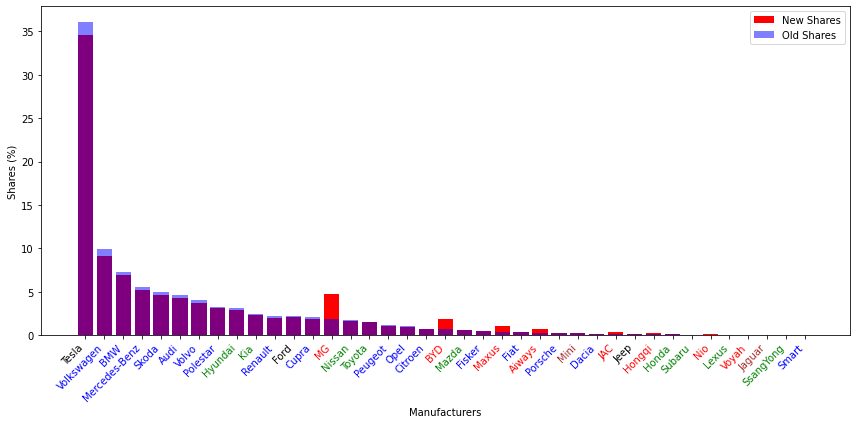

In [977]:
total_shares = graph_cf1['shares'].sum()
total_new_shares = graph_cf1['new_shares'].sum()
graph_cf1['shares'] = (graph_cf1['shares'] / total_shares) * 100
graph_cf1['new_shares'] = (graph_cf1['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf1_sample_sorted = graph_cf1.sort_values('shares', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf1_sample_sorted['firm_ids'], cf1_sample_sorted['new_shares'], color='red', label='New Shares')

# Plot the second bar chart behind the first one
plt.bar(cf1_sample_sorted['firm_ids'], cf1_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Manufacturers')
plt.ylabel('Shares (%)')
#plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    region = cf1_sample_sorted[cf1_sample_sorted['firm_ids'] == label.get_text()]['Region'].iloc[0]
    if region == 'China':
        label.set_color('red')
    elif region == 'EU':
        label.set_color('blue')
    elif region == 'Asia':
        label.set_color('green')
    elif region == 'GB':
        label.set_color('brown')

plt.legend()
plt.tight_layout()
plt.show()


In [978]:
table_cf1 = cf1.groupby(['firm_ids', 'Region'])[['prices_change', 'shares_change']].mean().reset_index()
table_cf1 = table_cf1[table_cf1['Region'] == 'China']
table_cf1.drop(columns=['Region'], inplace=True)

cols = ['prices_change', 'shares_change']
table_cf1[cols] = table_cf1[cols].applymap(lambda x: f"$ {x:.2f}\% $")

latex_table = table_cf1.to_latex(index=False, escape=False)

print(latex_table)

\begin{tabular}{lll}
\toprule
firm_ids & prices_change & shares_change \\
\midrule
  Aiways &  $ -24.31\% $ &  $ 159.11\% $ \\
     BYD &  $ -20.98\% $ &  $ 164.45\% $ \\
  Hongqi &  $ -10.49\% $ &  $ 162.95\% $ \\
     JAC &  $ -38.87\% $ &  $ 168.52\% $ \\
      MG &  $ -28.68\% $ &  $ 163.86\% $ \\
   Maxus &  $ -18.85\% $ &  $ 160.64\% $ \\
     Nio &  $ -11.35\% $ &  $ 163.49\% $ \\
   Voyah &  $ -14.67\% $ &  $ 166.09\% $ \\
\bottomrule
\end{tabular}



/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_54676/1325528053.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table_cf1.to_latex(index=False, escape=False)


## CF-2
#### EU manufacturers are prefectly competitive-> price = marginal costs
Implies no profit

In [979]:
cf2 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'profits', 'Region','nesting_ids']]
cf2

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C
...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C


In [980]:
cf2['new_prices'] = cf2['prices']
cf2.loc[cf2['Region'] == 'EU', 'new_prices'] = cf2.loc[cf2['Region'] == 'EU', 'costs']
cf2['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf2['new_prices'])
cf2['shares_change'] = 100 * (cf2['new_shares'] - cf2['shares']) / cf2['shares']
cf2['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf2['new_prices'], shares=cf2['new_shares'])
cf2['profits_change'] = 100 * (cf2['new_profits'] - cf2['profits']) / cf2['profits']
cf2

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids,new_prices,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C,26.452,5.514e-04,-36.541,4.092e-03,-36.541
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C,36.064,9.346e-06,-36.541,6.935e-05,-36.541
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F,59.514,6.410e-04,92.006,0.000e+00,-100.000
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F,114.144,2.168e-04,92.006,0.000e+00,-100.000
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C,58.126,2.081e-02,80.421,0.000e+00,-100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A,8.594,7.335e-04,89.115,0.000e+00,-100.000
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C,35.333,4.582e-03,80.532,0.000e+00,-100.000
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B,29.362,3.621e-05,84.384,0.000e+00,-100.000
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C,36.193,1.742e-02,80.532,0.000e+00,-100.000


In [981]:
graph_cf2 = cf2.groupby(['firm_ids', 'Region'])[['shares', 'new_shares', 'profits', 'new_profits']].sum().reset_index()

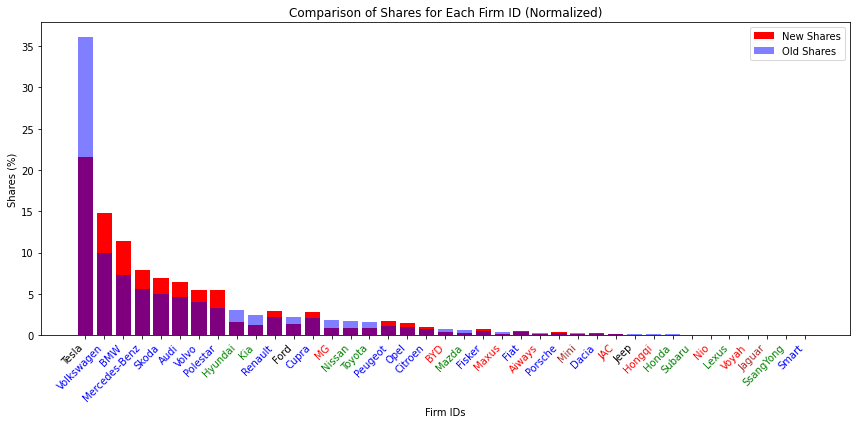

In [982]:
total_shares = graph_cf2['shares'].sum()
total_new_shares = graph_cf2['new_shares'].sum()
graph_cf2['shares'] = (graph_cf2['shares'] / total_shares) * 100
graph_cf2['new_shares'] = (graph_cf2['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf2_sample_sorted = graph_cf2.sort_values('shares', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf2_sample_sorted['firm_ids'], cf2_sample_sorted['new_shares'], color='red', label='New Shares')

# Plot the second bar chart behind the first one
plt.bar(cf2_sample_sorted['firm_ids'], cf2_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Firm IDs')
plt.ylabel('Shares (%)')
plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    region = cf2_sample_sorted[cf2_sample_sorted['firm_ids'] == label.get_text()]['Region'].iloc[0]
    if region == 'China':
        label.set_color('red')
    elif region == 'EU':
        label.set_color('blue')
    elif region == 'Asia':
        label.set_color('green')
    elif region == 'GB':
        label.set_color('brown')

plt.legend()
plt.tight_layout()
plt.show()


## CF-3
#### EU and Chinese manufacturers are prefectly competitive-> price = marginal costs
Implies no profit

In [983]:
cf3 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'profits', 'Region','nesting_ids']]
cf3

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C
...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C


In [984]:
cf3['new_prices'] = cf3['prices']
cf3.loc[cf3['Region'] == 'EU', 'new_prices'] = cf3.loc[cf3['Region'] == 'EU', 'costs']
cf3.loc[cf3['Region'] == 'China', 'new_prices'] = cf3.loc[cf3['Region'] == 'China', 'costs']
cf3['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf3['new_prices'])
cf3['shares_change'] = 100 * (cf3['new_shares'] - cf3['shares']) / cf3['shares']
cf3['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf3['new_prices'], shares=cf3['new_shares'])
cf3['profits_change'] = 100 * (cf3['new_profits'] - cf3['profits']) / cf3['profits']
cf3

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids,new_prices,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C,19.032,1.467e-03,68.858,0.0,-100.0
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C,28.643,2.487e-05,68.858,0.0,-100.0
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F,59.514,6.212e-04,86.071,0.0,-100.0
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F,114.144,2.101e-04,86.071,0.0,-100.0
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C,58.126,2.030e-02,76.056,0.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A,8.594,7.274e-04,87.553,0.0,-100.0
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C,35.333,4.471e-03,76.164,0.0,-100.0
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B,29.362,3.536e-05,80.054,0.0,-100.0
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C,36.193,1.699e-02,76.164,0.0,-100.0


In [985]:
graph_cf3 = cf3.groupby(['firm_ids', 'Region'])[['shares', 'new_shares', 'profits', 'new_profits']].sum().reset_index()

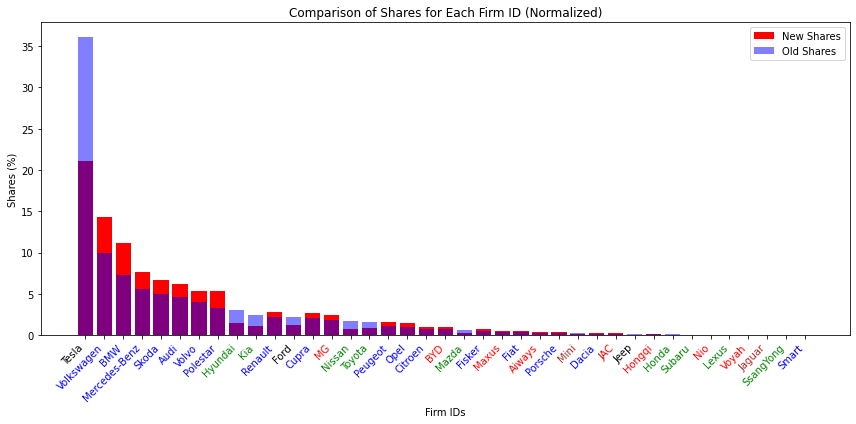

In [986]:
total_shares = graph_cf3['shares'].sum()
total_new_shares = graph_cf3['new_shares'].sum()
graph_cf3['shares'] = (graph_cf3['shares'] / total_shares) * 100
graph_cf3['new_shares'] = (graph_cf3['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf3_sample_sorted = graph_cf3.sort_values('shares', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf3_sample_sorted['firm_ids'], cf3_sample_sorted['new_shares'], color='red', label='New Shares')

# Plot the second bar chart behind the first one
plt.bar(cf3_sample_sorted['firm_ids'], cf3_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Firm IDs')
plt.ylabel('Shares (%)')
plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    region = cf3_sample_sorted[cf3_sample_sorted['firm_ids'] == label.get_text()]['Region'].iloc[0]
    if region == 'China':
        label.set_color('red')
    elif region == 'EU':
        label.set_color('blue')
    elif region == 'Asia':
        label.set_color('green')
    elif region == 'GB':
        label.set_color('brown')

plt.legend()
plt.tight_layout()
plt.show()


## CF-4
#### China increases subsidy -> decreased marginal cost

In [987]:
cf4 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'profits', 'Region','nesting_ids']]
cf4

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C
...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C


In [988]:
cf4['new_costs'] = cf4['costs']
cf4.loc[cf4['Region'] == 'China', 'new_costs'] *= 0.8
cf4['new_prices'] = nl_results.compute_prices(market_id=year_2023, costs=cf4['new_costs'])
cf4['prices_change'] = 100 * (cf4['new_prices'] - cf4['prices']) / cf4['prices']
cf4['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf4['new_prices'])
cf4['shares_change'] = 100 * (cf4['new_shares'] - cf4['shares']) / cf4['shares']
cf4['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf4['new_prices'], shares=cf4['new_shares'], costs=cf4['new_costs'])
cf4['profits_change'] = 100 * (cf4['new_profits'] - cf4['profits']) / cf4['profits']
cf4

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids,new_costs,new_prices,prices_change,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C,15.226,22.660,-14.335,1.418e-03,63.176,1.054e-02,63.491
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C,22.915,30.349,-15.845,3.117e-05,111.601,2.317e-04,112.009
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F,59.514,67.214,-0.134,3.005e-04,-9.988,2.314e-03,-11.027
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F,114.144,121.844,-0.074,1.016e-04,-9.988,7.826e-04,-11.027
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C,58.126,65.842,-0.021,1.129e-02,-2.091,8.712e-02,-2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A,8.594,17.480,-0.031,3.854e-04,-0.620,3.425e-03,-0.681
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C,35.333,43.052,-0.033,2.485e-03,-2.088,1.918e-02,-2.265
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B,29.362,36.823,-0.004,1.924e-05,-2.015,1.436e-04,-2.035
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C,36.193,43.913,-0.032,9.446e-03,-2.088,7.292e-02,-2.265


In [989]:
graph_cf4 = cf4.groupby(['firm_ids', 'Region'])[['shares', 'new_shares', 'profits', 'new_profits']].sum().reset_index() 

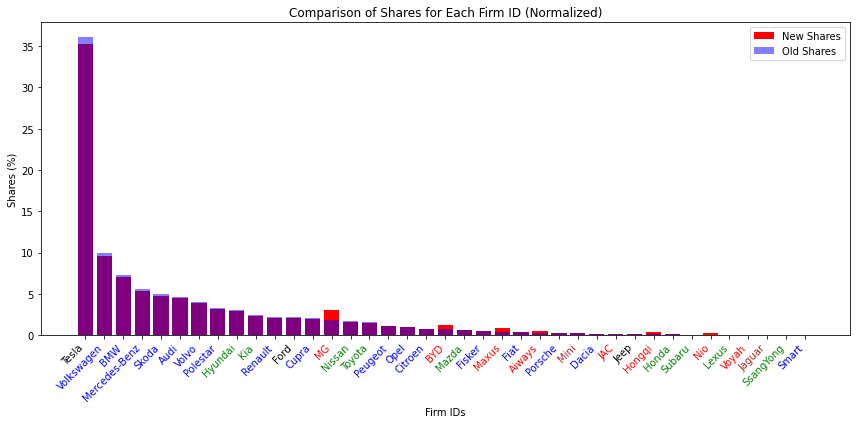

In [990]:
total_shares = graph_cf4['shares'].sum()
total_new_shares = graph_cf4['new_shares'].sum()
graph_cf4['shares'] = (graph_cf4['shares'] / total_shares) * 100
graph_cf4['new_shares'] = (graph_cf4['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf4_sample_sorted = graph_cf4.sort_values('shares', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf4_sample_sorted['firm_ids'], cf4_sample_sorted['new_shares'], color='red', label='New Shares')

# Plot the second bar chart behind the first one
plt.bar(cf4_sample_sorted['firm_ids'], cf4_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Firm IDs')
plt.ylabel('Shares (%)')
plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    region = cf4_sample_sorted[cf4_sample_sorted['firm_ids'] == label.get_text()]['Region'].iloc[0]
    if region == 'China':
        label.set_color('red')
    elif region == 'EU':
        label.set_color('blue')
    elif region == 'Asia':
        label.set_color('green')
    elif region == 'GB':
        label.set_color('brown')

plt.legend()
plt.tight_layout()
plt.show()


## CF-5
#### EU introduces subsidy -> decreased marginal cost

In [991]:
cf5 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'profits', 'Region','nesting_ids']]
cf5

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C
...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C


In [992]:
cf5['new_costs'] = cf5['costs']
cf5.loc[cf5['Region'] == 'EU', 'new_costs'] *= 0.8
cf5['costs_change'] = 100 * (cf5['new_costs'] - cf5['costs']) / cf5['costs']
cf5['new_prices'] = nl_results.compute_prices(market_id=year_2023, costs=cf5['new_costs'])
cf5['prices_change'] = 100 * (cf5['new_prices'] - cf5['prices']) / cf5['prices']
cf5['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf5['new_prices'])
cf5['shares_change'] = 100 * (cf5['new_shares'] - cf5['shares']) / cf5['shares']
cf5['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf5['new_prices'], shares=cf5['new_shares'], costs=cf5['new_costs'])
cf5['profits_change'] = 100 * (cf5['new_profits'] - cf5['profits']) / cf5['profits']
cf5

,firm_ids,product_ids,prices,shares,costs,profits,Region,nesting_ids,new_costs,costs_change,new_prices,prices_change,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,6.448e-03,China,C,19.032,0.0,26.440,-0.047,5.474e-04,-37.002,4.055e-03,-37.107
3,Aiways,U6,36.064,1.473e-05,28.643,1.093e-04,China,C,28.643,0.0,36.051,-0.035,9.279e-06,-37.002,6.874e-05,-37.107
8,Audi,e-tron,67.304,3.338e-04,59.514,2.601e-03,EU,F,47.611,-20.0,55.369,-17.732,4.954e-04,48.398,3.844e-03,47.798
11,Audi,e-tron GT,121.934,1.129e-04,114.144,8.796e-04,EU,F,91.315,-20.0,99.074,-18.748,7.340e-04,550.014,5.694e-03,547.386
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,8.913e-02,EU,C,46.501,-20.0,54.655,-17.008,3.297e-02,185.894,2.688e-01,201.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,3.449e-03,EU,A,6.875,-20.0,15.928,-8.906,3.777e-04,-2.616,3.419e-03,-0.849
328,Volvo,C40,43.066,2.538e-03,35.333,1.963e-02,EU,C,28.266,-20.0,36.080,-16.222,4.105e-03,61.722,3.208e-02,63.403
329,Volvo,EX30,36.825,1.964e-05,29.362,1.466e-04,EU,B,23.489,-20.0,30.996,-15.829,3.225e-05,64.203,2.420e-04,65.157
332,Volvo,XC40,43.927,9.647e-03,36.193,7.461e-02,EU,C,28.954,-20.0,36.768,-16.296,1.597e-02,65.527,1.248e-01,67.248


In [993]:
graph_cf5 = cf5.groupby(['firm_ids', 'Region'])[['shares', 'new_shares', 'profits', 'new_profits']].sum().reset_index() 

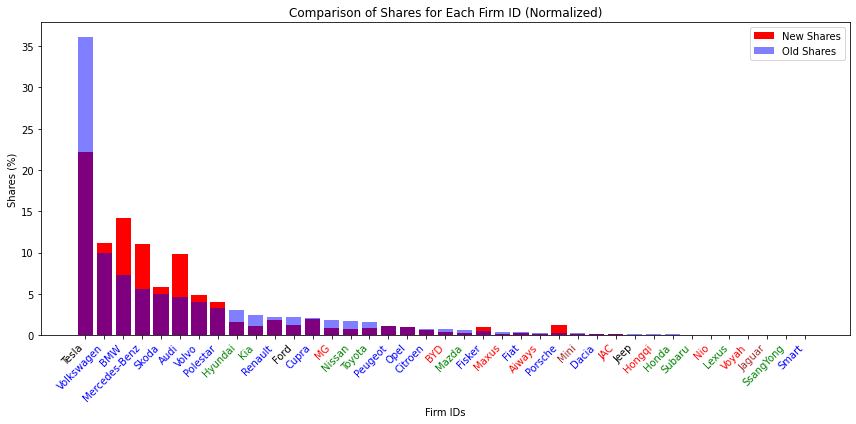

In [994]:
total_shares = graph_cf5['shares'].sum()
total_new_shares = graph_cf5['new_shares'].sum()
graph_cf5['shares'] = (graph_cf5['shares'] / total_shares) * 100
graph_cf5['new_shares'] = (graph_cf5['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf5_sample_sorted = graph_cf5.sort_values('shares', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf5_sample_sorted['firm_ids'], cf5_sample_sorted['new_shares'], color='red', label='New Shares')

# Plot the second bar chart behind the first one
plt.bar(cf5_sample_sorted['firm_ids'], cf5_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Firm IDs')
plt.ylabel('Shares (%)')
plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    region = cf5_sample_sorted[cf5_sample_sorted['firm_ids'] == label.get_text()]['Region'].iloc[0]
    if region == 'China':
        label.set_color('red')
    elif region == 'EU':
        label.set_color('blue')
    elif region == 'Asia':
        label.set_color('green')
    elif region == 'GB':
        label.set_color('brown')

plt.legend()
plt.tight_layout()
plt.show()


This indicates that firms with premium cars would steal more market share when marginal costs is lowered and the price is subsequently lowered.

# Test

In [995]:
cf2 = product_data.loc[product_data['market_ids'] == year_2023, ['firm_ids', 'product_ids', 'prices', 'shares', 'costs', 'markups', 'profits', 'Region','nesting_ids']]
cf2

,firm_ids,product_ids,prices,shares,costs,markups,profits,Region,nesting_ids
2,Aiways,U5,26.452,8.690e-04,19.032,0.390,6.448e-03,China,C
3,Aiways,U6,36.064,1.473e-05,28.643,0.259,1.093e-04,China,C
8,Audi,e-tron,67.304,3.338e-04,59.514,0.131,2.601e-03,EU,F
11,Audi,e-tron GT,121.934,1.129e-04,114.144,0.068,8.796e-04,EU,F
14,Audi,Q4 e-tron,65.855,1.153e-02,58.126,0.133,8.913e-02,EU,C
...,...,...,...,...,...,...,...,...,...
325,Volkswagen,up!,17.485,3.878e-04,8.594,1.035,3.449e-03,EU,A
328,Volvo,C40,43.066,2.538e-03,35.333,0.219,1.963e-02,EU,C
329,Volvo,EX30,36.825,1.964e-05,29.362,0.254,1.466e-04,EU,B
332,Volvo,XC40,43.927,9.647e-03,36.193,0.214,7.461e-02,EU,C


In [996]:
cf2['new_costs'] = cf2['costs']
cf2.loc[cf2['Region'] == 'China', 'new_costs'] -= cf2.loc[cf2['Region'] == 'China', 'prices'] - cf2.loc[cf2['Region'] == 'China', 'costs']
cf2['new_prices'] = nl_results.compute_prices(market_id=year_2023, costs=cf2['new_costs'])
cf2['prices_change'] = 100 * (cf2['new_prices'] - cf2['prices']) / cf2['prices']
cf2['new_markups'] = nl_results.compute_markups(market_id=year_2023, prices=cf2['new_prices'], costs=cf2['new_costs'])
cf2['markups_change'] = 100 * (cf2['new_markups'] - cf2['markups']) / cf2['markups']
cf2['new_shares'] = nl_results.compute_shares(market_id=year_2023, prices=cf2['new_prices'])
cf2['shares_change'] = 100 * (cf2['new_shares'] - cf2['shares']) / cf2['shares']
cf2['new_profits'] = nl_results.compute_profits(market_id=year_2023, prices=cf2['new_prices'], shares=cf2['new_shares'], costs=cf2['new_costs'])
cf2['profits_change'] = 100 * (cf2['new_profits'] - cf2['profits']) / cf2['profits']
cf2[cf2['Region'] == 'China']

,firm_ids,product_ids,prices,shares,costs,markups,profits,Region,nesting_ids,new_costs,new_prices,prices_change,new_markups,markups_change,new_shares,shares_change,new_profits,profits_change
2,Aiways,U5,26.452,8.690e-04,19.032,0.390,6.448e-03,China,C,11.612,19.066,-27.922,0.391,0.282,2.240e-03,157.777,1.670e-02,158.970
3,Aiways,U6,36.064,1.473e-05,28.643,0.259,1.093e-04,China,C,21.223,28.678,-20.481,0.260,0.342,3.797e-05,157.777,2.830e-04,158.970
41,BYD,Atto 3,31.000,1.090e-03,23.546,0.317,8.124e-03,China,C,16.093,23.630,-23.774,0.319,0.764,2.803e-03,157.213,2.113e-02,160.099
42,BYD,Dolphin,23.324,9.966e-04,15.870,0.470,7.428e-03,China,C,8.416,15.954,-31.599,0.472,0.592,2.563e-03,157.213,1.932e-02,160.099
44,BYD,Han,59.039,1.473e-05,51.623,0.144,1.092e-04,China,E,44.207,51.654,-12.509,0.144,0.357,3.902e-05,164.908,2.906e-04,166.013
45,BYD,Seal,32.062,1.571e-04,24.651,0.301,1.164e-03,China,D,17.240,24.674,-23.044,0.301,0.213,4.205e-04,167.632,3.125e-03,168.449
47,BYD,Tang,56.015,2.455e-05,48.599,0.153,1.820e-04,China,E,41.183,48.630,-13.184,0.153,0.353,6.503e-05,164.908,4.843e-04,166.013
82,Hongqi,E-HS9,72.369,2.749e-04,64.778,0.117,2.087e-03,China,F,57.188,65.055,-10.106,0.121,3.210,6.959e-04,153.125,5.475e-03,162.368
98,JAC,e-JS4,29.011,4.173e-04,17.735,0.636,4.705e-03,China,J,6.460,17.743,-38.839,0.636,0.026,1.119e-03,168.224,1.263e-02,168.413
131,Maxus,Euniq5,37.210,4.418e-05,29.412,0.265,3.446e-04,China,M,21.614,29.895,-19.660,0.277,4.475,1.072e-04,142.538,8.874e-04,157.550


In [997]:
graph_cf2 = cf2.groupby(['firm_ids', 'Region'])[['shares', 'new_shares', 'profits', 'new_profits']].sum().reset_index() 

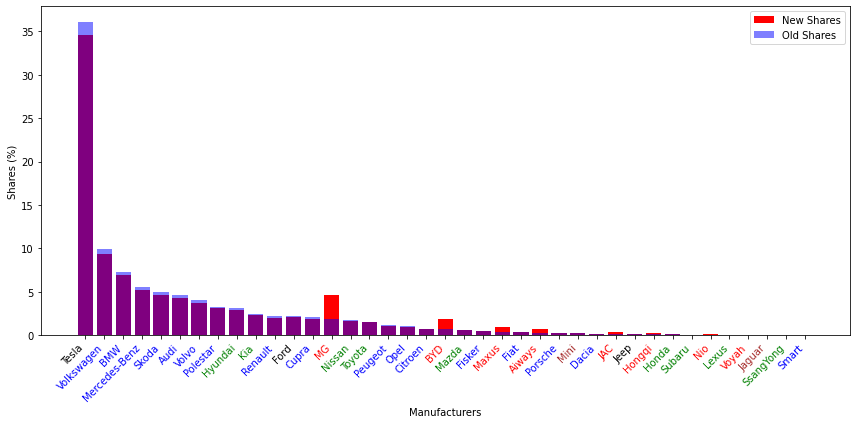

In [998]:
total_shares = graph_cf2['shares'].sum()
total_new_shares = graph_cf2['new_shares'].sum()
graph_cf2['shares'] = (graph_cf2['shares'] / total_shares) * 100
graph_cf2['new_shares'] = (graph_cf2['new_shares'] / total_new_shares) * 100

# Sorting the data by 'shares'
cf2_sample_sorted = graph_cf2.sort_values('shares', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Plot the first bar chart with 50% transparency
plt.bar(cf2_sample_sorted['firm_ids'], cf2_sample_sorted['new_shares'], color='red', label='New Shares')

# Plot the second bar chart behind the first one
plt.bar(cf2_sample_sorted['firm_ids'], cf2_sample_sorted['shares'], color='blue', label='Old Shares', alpha=0.5)

plt.xlabel('Manufacturers')
plt.ylabel('Shares (%)')
#plt.title('Comparison of Shares for Each Firm ID (Normalized)')
plt.xticks(rotation=45, ha='right')

# Highlight Chinese firm_ids by changing the text color to red
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    region = cf2_sample_sorted[cf2_sample_sorted['firm_ids'] == label.get_text()]['Region'].iloc[0]
    if region == 'China':
        label.set_color('red')
    elif region == 'EU':
        label.set_color('blue')
    elif region == 'Asia':
        label.set_color('green')
    elif region == 'GB':
        label.set_color('brown')

plt.legend()
plt.tight_layout()
plt.show()


In [999]:
table_cf2 = cf2.groupby(['firm_ids', 'Region'])[['prices_change', 'markups_change', 'shares_change', 'profits_change']].mean().reset_index()
table_cf2 = table_cf2[table_cf2['Region'] == 'China']
table_cf2.drop(columns=['Region'], inplace=True)

cols = ['prices_change', 'markups_change', 'shares_change', 'profits_change']
table_cf2[cols] = table_cf2[cols].applymap(lambda x: f"$ {x:.2f}\% $")

latex_table = table_cf2.to_latex(index=False, escape=False)

print(latex_table)


\begin{tabular}{lllll}
\toprule
firm_ids & prices_change & markups_change & shares_change & profits_change \\
\midrule
  Aiways &  $ -24.20\% $ &     $ 0.31\% $ &  $ 157.78\% $ &   $ 158.97\% $ \\
     BYD &  $ -20.82\% $ &     $ 0.46\% $ &  $ 162.37\% $ &   $ 164.13\% $ \\
  Hongqi &  $ -10.11\% $ &     $ 3.21\% $ &  $ 153.12\% $ &   $ 162.37\% $ \\
     JAC &  $ -38.84\% $ &     $ 0.03\% $ &  $ 168.22\% $ &   $ 168.41\% $ \\
      MG &  $ -27.84\% $ &     $ 1.72\% $ &  $ 155.99\% $ &   $ 163.44\% $ \\
   Maxus &  $ -17.68\% $ &     $ 4.68\% $ &  $ 142.54\% $ &   $ 157.55\% $ \\
     Nio &  $ -11.29\% $ &     $ 0.47\% $ &  $ 161.71\% $ &   $ 163.11\% $ \\
   Voyah &  $ -14.64\% $ &     $ 0.15\% $ &  $ 165.15\% $ &   $ 165.62\% $ \\
\bottomrule
\end{tabular}



/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_54676/2658939347.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table_cf2.to_latex(index=False, escape=False)
